1. Problem Statement:
   Identify factors influencing whether a tech professional develops mental health issues and seeks treatment.

   Why:

   Tech industry has high stress & burnout.

   Early identification helps employers design interventions.

2. Dataset: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data

3. EDA

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn import datasets

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# For combining pipelines after encoding
from sklearn.compose import make_column_selector as selector

sns.set(style="whitegrid")

In [37]:
df = pd.read_csv("survey.csv")
df.head()  

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,45809.00,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,45809.00,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


CLEANING

In [38]:
df.drop(columns=["Timestamp",'state',"comments",'self_employed',"Country"], inplace=True)

In [40]:

# Fill missing 'work_interfere' with "Don't know"
df['work_interfere'].fillna("Don't know", inplace=True)

# Confirm no missing values remain
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Age                          0
Gender                       0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


C:\Users\shrut\AppData\Local\Temp\ipykernel_30300\3633215076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna("Don't know", inplace=True)


In [ ]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    
    if gender in ['male', 'm', 'male-ish', 'maile', 'malr', 'cis male', 'cis man', 'male (cis)', 'msle', 'mail', 'make']:
        return 'Male'
    elif gender in ['female', 'f', 'cis female', 'woman', 'femail', 'cis-female/femme', 'female (cis)', 'trans female', 'trans woman']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

df['Gender'].value_counts()


Gender
Male      988
Female    247
Other      24
Name: count, dtype: int64

In [ ]:
# Keep only valid age values
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

In [ ]:
df = df.drop_duplicates()

#### Generating Sample Continuous Data to use regression


In [ ]:
df_encoded = df.copy()

# Encode categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# Convert treatment to binary
df_encoded['treatment_binary'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Calculate probability by group
df_encoded['treatment_prob'] = df_encoded.groupby('no_employees')['treatment_binary'].transform('mean')

# Set this as the regression target
target = df_encoded['treatment_prob']

In [ ]:
# Features = all columns except the target and original treatment
X = df_encoded.drop(columns=['treatment', 'treatment_binary', 'treatment_prob'])

# Target = continuous regression target
y = df_encoded['treatment_prob']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Features = all columns except the target and original treatment
X = df_encoded.drop(columns=['treatment', 'treatment_binary', 'treatment_prob'])

# Target = continuous regression target
y = df_encoded['treatment_prob']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### A. Regression Models

Not the correct model in this case

In [ ]:
# --- Linear Regression ---
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.0364
MAE: 0.0305
R² Score: 0.2094


In [ ]:

# --- Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Performance:")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

Decision Tree Regressor Performance:
RMSE: 0.0000
R² Score: 1.0000


Decision Tree Regressor model performs well with r square value of 1 which means the model perfectly fits the test data.

In [ ]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Regressor Performance:
RMSE: 0.0000
R² Score: 1.0000


Random forest model also performs the best with no errors.

### B. Classification Models

Logistic Regression Accuracy: 0.792


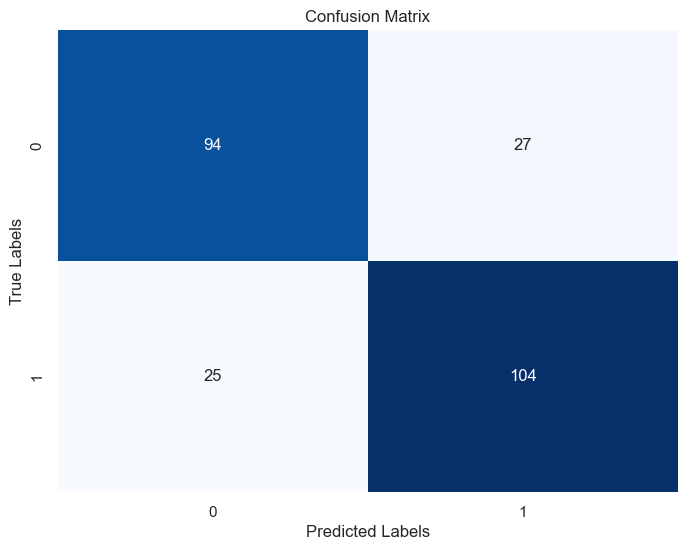

Precision: 0.7938931297709924
Recall: 0.8062015503875969
F1-Score: 0.8


In [ ]:
y_class = df['treatment'].map({'Yes': 1, 'No': 0})


# Classification target (binary)
y_class = df['treatment'].map({'Yes': 1, 'No': 0})

# Split dataset for classification
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# --- Logistic Regression for Classification ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on classification target
log_reg.fit(X_train, y_class_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test)

# Accuracy
acc_log = accuracy_score(y_class_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Other metrics
precision = precision_score(y_class_test, y_pred_log)
recall = recall_score(y_class_test, y_pred_log)
f1 = f1_score(y_class_test, y_pred_log)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

In [ ]:
# --- Decision Tree Classifier ---
dt_clf = DecisionTreeClassifier(random_state=50, max_depth=5)

# Train the classifier
dt_clf.fit(X_train, y_class_train)

# Predict on test data
y_pred_dt_clf = dt_clf.predict(X_test)

# Accuracy
acc_dt_clf = accuracy_score(y_class_test, y_pred_dt_clf)
print("Decision Tree Classifier Accuracy:", acc_dt_clf)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_dt_clf)
print("Confusion Matrix:\n", cm)

Decision Tree Classifier Accuracy: 0.784
Confusion Matrix:
 [[106  15]
 [ 39  90]]


Random Forest Classifier Accuracy: 0.8
Confusion Matrix:
 [[ 93  28]
 [ 22 107]]


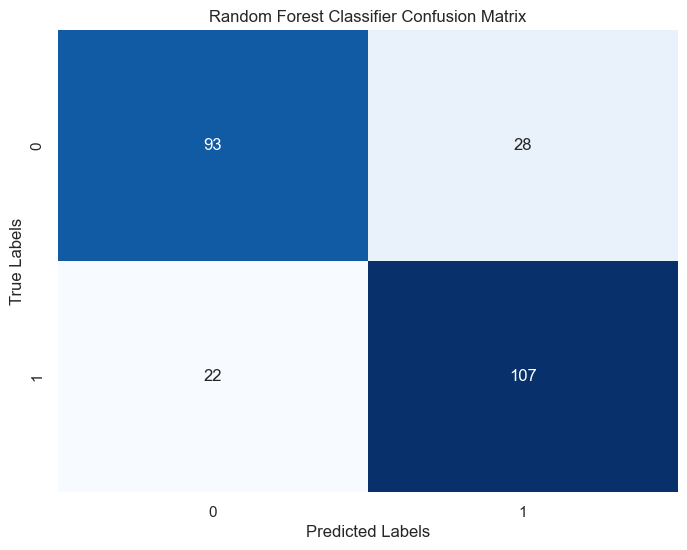

In [ ]:
# --- Random Forest Classifier ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_class_train)

# Predict on test set
y_pred_rf_clf = rf_clf.predict(X_test)

# Accuracy
acc_rf_clf = accuracy_score(y_class_test, y_pred_rf_clf)
print("Random Forest Classifier Accuracy:", acc_rf_clf)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_rf_clf)
print("Confusion Matrix:\n", cm)

# Visualization with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

#### Visualizing a Decision Tree

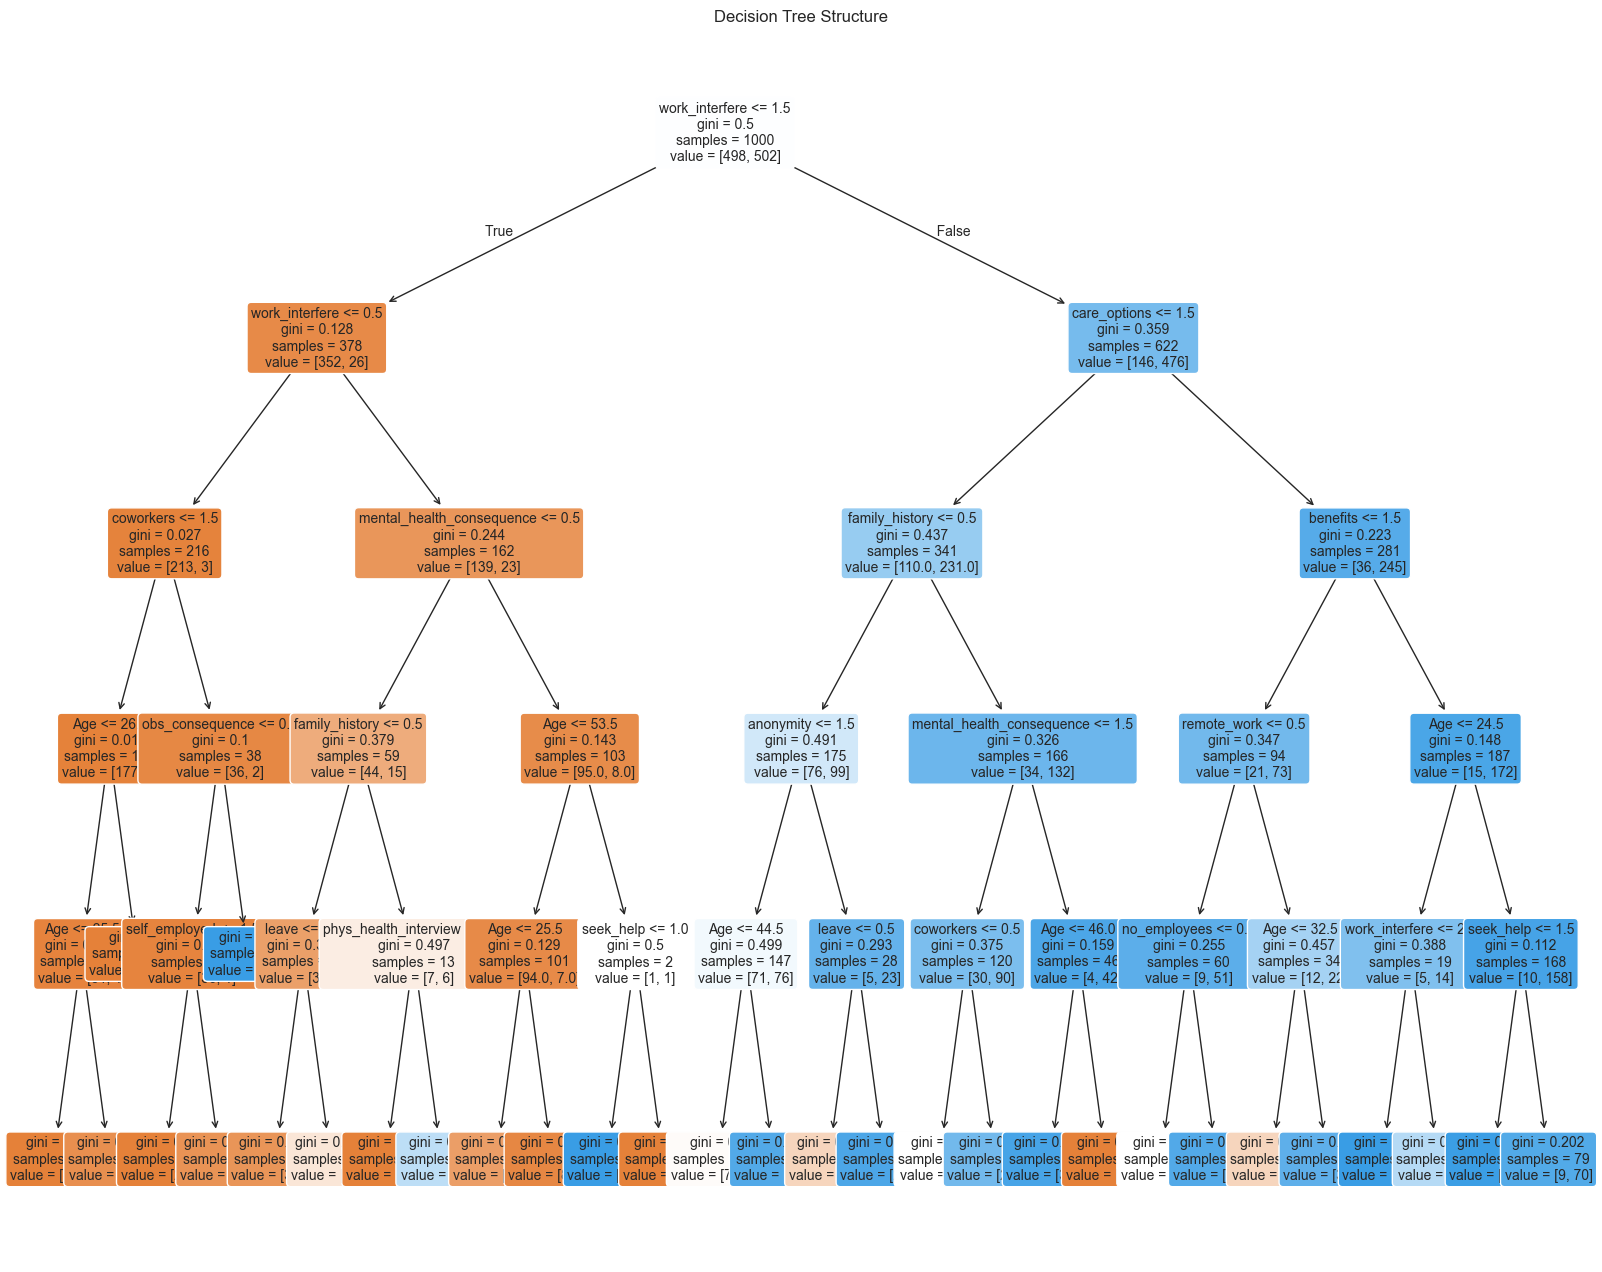

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 16))
plot_tree(dt_clf, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

#### Hyperparameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid. You can play around with different grids or make a giant one with a lot of numbers.

param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}


# Assume rf_reg is your RandomForestRegressor instance
grid_search = GridSearchCV(estimator= dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_class_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validated accuracy: 0.8140000000000001


In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)

# Display selected columns, e.g., parameters and mean test score
results_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.742,0.012884
1,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.754,0.019849
2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.738,0.012083
3,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.739,0.012806
4,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.729,0.016553
...,...,...,...
211,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.756,0.031369
212,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.758,0.026571
213,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.757,0.027313
214,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.757,0.027313
